


# **Data Description**
Parkinson's disease (PD) is one of the most common movement disorders, affecting approximately 1 million Americans (estimates range between 4 and 6.5 million people worldwide) and about 1% of older adults.

This database contains measures of gait from 93 patients with idiopathic PD (mean age: 66.3 years; 63% men), and 73 healthy controls (mean age: 66.3 years; 55% men).
 Underneath each foot were 8 sensors that measure force (in Newtons) as a function of time.

# Significant components (2D)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
import os
%matplotlib notebook

In [ ]:
ds_co = pd.read_csv('https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Combined%20Datasets/Co_final.csv')
ds_pt = pd.read_csv('https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Combined%20Datasets/Pt_final.csv')

In [ ]:
ds_co = ds_co.iloc[:, 1:-2]
ds_pt = ds_pt.iloc[:, 1:-2]

In [ ]:
# Creating a Polynomial Features object

"""poly = PolynomialFeatures(degree=2)
ds_co_poly = poly.fit_transform(ds_co)
ds_pt_poly = poly.fit_transform(ds_pt)"""
ds_co_poly = ds_co
ds_pt_poly = ds_pt

In [ ]:
pca1 = decomposition.PCA(n_components=2)
ds_co_poly_pca = pca1.fit_transform(ds_co_poly)
ds_pt_poly_pca = pca1.fit_transform(ds_pt_poly)

ValueError: at least one array or dtype is required

In [ ]:
# Dataframe consisting of significance of components of Polynomial Features
df_pca1 = pd.DataFrame(pca1.components_)
df_pca1.shape

In [ ]:
# Retrieving the most significant component's values

pd.DataFrame(pca1.components_).apply((lambda x: x.nlargest(3)), axis=1)

In [ ]:
# Retrieving the most significant component's index
pd.DataFrame(pca1.components_).apply((lambda x: x.argmax()), axis=1)

# Significant Component (3D)

In [ ]:
# Importing files with data for affected and non-affected test subjects.
GaCo02_01='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/CSV/GaCo02_01.csv'
GaPt04_01='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/CSV/GaPt04_01.csv'
ds_co_3d = pd.read_csv(GaCo02_01)
ds_pt_3d = pd.read_csv(GaPt04_01)

In [ ]:
ds_co_3d = ds_co_3d.iloc[:, 1:-2]
ds_pt_3d = ds_pt_3d.iloc[:, 1:-2]

In [ ]:

# Creating a Polynomial Features object of degree 2

poly = PolynomialFeatures(degree=2)

# Transforming data using polynomial Features object
ds_co_poly_3d = poly.fit_transform(ds_co_3d)
ds_pt_poly_3d = poly.fit_transform(ds_pt_3d)

In [ ]:
# Apllied PCA to reduce data to 3 dimensions

pca2 = decomposition.PCA(n_components=3)
ds_co_poly_pca_3d = pca2.fit_transform(ds_co_poly_3d)
ds_pt_poly_pca_3d = pca2.fit_transform(ds_pt_poly_3d)

In [ ]:
# Dataframe consisting of significance values of components of Polynomial Features

df_pca2 = pd.DataFrame(pca2.components_)
df_pca2.shape

(3, 153)

In [ ]:
# Retrieving the most significant component's values along with their indices

pd.DataFrame(pca2.components_).apply((lambda x: x.nlargest(3)), axis=1)

,17,18,32,88,98,138,140,147
0,NaN,NaN,NaN,NaN,NaN,0.198216,0.189826,0.191975
1,0.419327,0.211217,0.204539,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.200694,0.367403,NaN,NaN,0.202334


In [ ]:
# Retrieving the most significant component's index

pd.DataFrame(pca1.components_).apply((lambda x: x.argmax()), axis=1)

0    8
1    6
dtype: int64

In [ ]:
# Retrieving the 3 most significant component's name for PC1

print([poly.get_feature_names_out(ds_co_3d.columns)[138],
poly.get_feature_names_out(ds_co_3d.columns)[147],
poly.get_feature_names_out(ds_co_3d.columns)[140]])
print("\n")
# Second most significant component's name for PC2

print([poly.get_feature_names_out(ds_co_3d.columns)[17],poly.get_feature_names_out(ds_co_3d.columns)[18],poly.get_feature_names_out(ds_co_3d.columns)[32]])
print("\n")
# Third most significant component's name for PC3

print([poly.get_feature_names_out(ds_co_3d.columns)[98],poly.get_feature_names_out(ds_co_3d.columns)[147],poly.get_feature_names_out(ds_co_3d.columns)[88]])
print("\n")

['VGRF_right_s4^2', 'VGRF_right_s6^2', 'VGRF_right_s4 VGRF_right_s6']


['VGRF_left_s1^2', 'VGRF_left_s1 VGRF_left_s2', 'VGRF_left_s1 VGRF_right_s8']


['VGRF_left_s7^2', 'VGRF_right_s6^2', 'VGRF_left_s6 VGRF_left_s7']




# KNN Model
Using Transformed dataset
([Transformed Data](https://github.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/tree/master/Transformed%20Data ))

Accuracy: 0.9090909090909091

Precision: 0.7619047619047619

Recall: 0.8888888888888888

F1-Score: 0.8205128205128205

In [ ]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
import os
import scipy.stats as sc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Transformed_Co='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Co'
Transformed_Pt='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Pt'
df_co = pd.read_csv(Transformed_Co, index_col = 0)
df_pt = pd.read_csv(Transformed_Pt , index_col = 0)

In [ ]:
df_co_len = df_co.shape[0]
df_pt_len = df_pt.shape[0]

In [ ]:
df_co_pca = pd.DataFrame(df_co)
df_pt_pca = pd.DataFrame(df_pt)

In [ ]:
y1 = pd.Series([0]*df_co_len)
print(y1)
y1.shape

0     0
1     0
2     0
3     0
4     0
     ..
87    0
88    0
89    0
90    0
91    0
Length: 92, dtype: int64


(92,)

In [ ]:
y2 = pd.Series([1]*df_pt_len, index = range(df_co_len-1,(df_co_len + df_pt_len)-1))
print(y2)
y2.shape

91     1
92     1
93     1
94     1
95     1
      ..
300    1
301    1
302    1
303    1
304    1
Length: 214, dtype: int64


(214,)

In [ ]:

y = pd.concat([y1,y2])
y.shape

(306,)

In [ ]:

X = pd.concat([df_co_pca, df_pt_pca])

In [ ]:
score_val = 0
min_range = 0
max_range = 1000
state = 0
neigh = 0

for rand_state in range(min_range, max_range):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y, random_state = rand_state)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


    for neighbors in ([1, 3, 5, 10, 15, 20]):
        knn = KNeighborsClassifier(n_neighbors = neighbors)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, np.ravel(y_test))

        if score > score_val:
            neigh = neighbors
            score_val = score
            state = rand_state

    print('{} out of {} done'.format(rand_state - min_range, max_range - min_range))
print("Neighbors = {}, Score = {}, Random State = {}".format(neigh, score_val, state))

In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
for neighbors in ([1, 3, 5, 10, 15, 20]):

    knn = KNeighborsClassifier(n_neighbors = neighbors)
    knn.fit(X_train, y_train)
    print("Neighbors = {}".format(neighbors))
    print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Neighbors = 1
Accuracy of K-NN classifier on training set: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Accuracy of K-NN classifier on test set: 0.92

Neighbors = 3
Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.84

Neighbors = 5
Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.82

Neighbors = 10
Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.75

Neighbors = 15
Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.77

Neighbors = 20
Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.78



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:

print((y_train1).shape)

(229,)


In [ ]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
knn = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
max_score = 0
best_param = []
for i in range(0,1000):
    from sklearn.model_selection import GridSearchCV

    grid_values = {'n_neighbors': [1, 2, 5, 10, 20, 50, 70, 100]}

    grid_lr = GridSearchCV(knn, param_grid = grid_values, scoring = 'accuracy')
    grid_lr.fit(X_train, y_train1)
    if max_score < grid_lr.best_score_:
        max_score = grid_lr.best_score_
        best_param = grid_lr.best_params_
print( max_score)
print( best_param)

0.8557487922705315
{'n_neighbors': 1}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve
best_score = 0
for i in range(200):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train, np.ravel(y_train))

    # print('gamma = {:.2f}, C = {:.2f}, accuracy = {}'.format(this_gamma, this_C, clf.score(X_test, np.ravel(y_test))))
    grid_values = {'n_neighbors': [1, 2, 5, 10, 20, 50, 70, 100]}
    grid_clf = GridSearchCV(knn, param_grid=grid_values, scoring='roc_auc')
    grid_clf.fit(X_train, y_train1)
    # decision_fn_scores = grid_clf.decision_function(X_test)

    if best_score < grid_clf.best_score_:
        best_score = grid_clf.best_score_
        prediction = grid_clf.predict(X_test)


        prec = precision_score(y_test, prediction)
        rec = recall_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)

y_true= y_test
y_pred=knn.predict(X_test)
print(best_score)

0.9358635752688172


In [ ]:
grid_clf.best_params_

{'n_neighbors': 5}

In [ ]:
print("Precision: {}".format(prec))
print("Recall: {}".format(rec))
print("F1: {}".format(f1))

Precision: 0.8545454545454545
Recall: 0.8392857142857143
F1: 0.8468468468468467


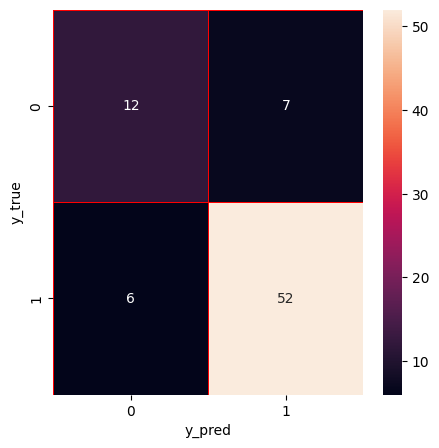

In [ ]:
#confusion matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_true, y_pred)

import seaborn as sns
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[1, 0]
fn = cm[0, 1]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.8311688311688312
Precision: 0.6666666666666666
Recall: 0.631578947368421
F1-Score: 0.6486486486486486


#Logistic Regression
Using Transformed dataset
([Transformed Data](https://github.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/tree/master/Transformed%20Data ))

Accuracy: 0.8701298701298701

Precision: 0.7368421052631579

Recall: 0.7368421052631579

F1-Score: 0.7368421052631579

In [ ]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
import os
import scipy.stats as sc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [ ]:
Transformed_Co='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Co'
Transformed_Pt='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Pt'

df_co = pd.read_csv(Transformed_Co, index_col = 0)
df_pt = pd.read_csv(Transformed_Pt , index_col = 0)

In [ ]:
df_co_len = df_co.shape[0]
df_pt_len = df_pt.shape[0]

In [ ]:
df_co_pca = pd.DataFrame(df_co)
df_pt_pca = pd.DataFrame(df_pt)

In [ ]:
y1 = pd.Series([0]*df_co_len)
y1.shape

(92,)

In [ ]:
y2 = pd.Series([1]*df_pt_len, index = range(df_co_len-1,(df_co_len + df_pt_len)-1))
y2.shape

(214,)

In [ ]:
y = pd.concat([y1,y2])
y.shape

(306,)

In [ ]:
X = pd.concat([df_co_pca, df_pt_pca])

In [ ]:
c_val = 0
score_val = 0
min_range = 0
max_range = 200
state = 0

for rand_state in range(min_range, max_range):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y, random_state = rand_state)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


    for x in [1, 5, 10, 20, 100, 200, 400]:
        clf = LogisticRegression(C=x).fit(X_train, np.ravel(y_train))
        score = clf.score(X_test, np.ravel(y_test))

        if score > score_val:
            c_val = x
            score_val = score
            state = rand_state

    print('{} out of {} done'.format(rand_state - min_range, max_range - min_range))
print("C = {}, Score = {}, Random State = {}".format(c_val, score_val, state))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
best_score = 0
for i in range(200):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    clf = LogisticRegression().fit(X_train, np.ravel(y_train))


    grid_vals = {'C': [0.1, 1, 5, 10, 12, 15, 20, 25, 50, 100, 250]}
    grid_clf = GridSearchCV(clf, param_grid=grid_vals, scoring='accuracy')
    grid_clf.fit(X_train, y_train1)
    decision_fn_scores = grid_clf.decision_function(X_test)

    if best_score < grid_clf.best_score_:
        best_score = grid_clf.best_score_
        best_params = grid_clf.best_params_
        prediction = grid_clf.predict(X_test)
        y_score = grid_clf.decision_function(X_test)
        prec = precision_score(y_test, prediction)
        rec = recall_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

y_true= y_test
y_pred=clf.predict(X_test)

print(best_score)
print(best_params)

In [ ]:
print('Precision: {:.4f}'.format(prec))
print('Recall: {:.4f}'.format(rec))
print('F1: {:.4f}'.format(f1))
print('AUC: {:.4f}'.format(roc_auc))

Precision: 0.7547
Recall: 0.8333
F1: 0.7921
AUC: 0.8427


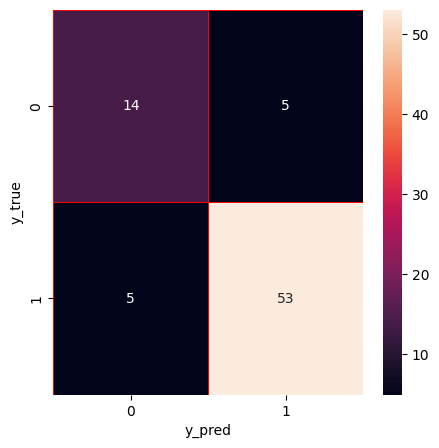

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_true= y_test
y_pred=clf.predict(X_test)
cm= confusion_matrix(y_true, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[1, 0]
fn = cm[0, 1]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.8701298701298701
Precision: 0.7368421052631579
Recall: 0.7368421052631579
F1-Score: 0.7368421052631579


# SVM- Linear Kernel
Using Transformed dataset
([Transformed Data](https://github.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/tree/master/Transformed%20Data ))

Accuracy: 0.8181818181818182

Precision: 0.6923076923076923

Recall: 0.75

F1-Score: 0.7199999999999999

In [ ]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
import os
import scipy.stats as sc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [ ]:
Transformed_Co='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Co'
Transformed_Pt='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Pt'

df_co = pd.read_csv(Transformed_Co, index_col = 0)
df_pt = pd.read_csv(Transformed_Pt , index_col = 0)

In [ ]:
df_co_len = df_co.shape[0]
df_pt_len = df_pt.shape[0]

In [ ]:

df_co_pca = pd.DataFrame(df_co)
df_pt_pca = pd.DataFrame(df_pt)

In [ ]:
y1 = pd.Series([0]*df_co_len)
y1.shape

(92,)

In [ ]:

y2 = pd.Series([1]*df_pt_len, index = range(df_co_len-1,(df_co_len + df_pt_len)-1))
y2.shape

(214,)

In [ ]:
y = pd.concat([y1,y2])
y.shape

(306,)

In [ ]:
X = pd.concat([df_co_pca, df_pt_pca])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
best_score = 0
for i in range(200):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    clf = SVC(kernel = 'linear', C = 1).fit(X_train, np.ravel(y_train))
    # print('gamma = {:.2f}, C = {:.2f}, accuracy = {}'.format(this_gamma, this_C, clf.score(X_test, np.ravel(y_test))))
    grid_vals = {'C': [0.1, 1, 5, 10, 12, 15, 20, 25, 50, 100, 250]}
    grid_clf = GridSearchCV(clf, param_grid=grid_vals, scoring='accuracy')
    grid_clf.fit(X_train, y_train1)
    decision_fn_scores = grid_clf.decision_function(X_test)

    if best_score < grid_clf.best_score_:
        best_score = grid_clf.best_score_
        best_params = grid_clf.best_params_
        prediction = grid_clf.predict(X_test)
        y_score = grid_clf.decision_function(X_test)
        prec = precision_score(y_test, prediction)
        rec = recall_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

print(best_score)
print(best_params)

0.8822222222222222
{'C': 1}


In [ ]:

print('Precision: {:.4f}'.format(prec))
print('Recall: {:.4f}'.format(rec))
print('F1: {:.4f}'.format(f1))
print('AUC: {:.4f}'.format(roc_auc))

Precision: 0.8333
Recall: 0.9091
F1: 0.8696
AUC: 0.8281


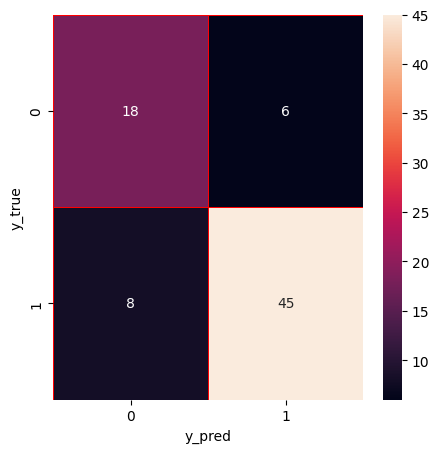

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_true= y_test
y_pred=clf.predict(X_test)
cm= confusion_matrix(y_true, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[1, 0]
fn = cm[0, 1]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.8181818181818182
Precision: 0.6923076923076923
Recall: 0.75
F1-Score: 0.7199999999999999


# SVM- Sigmoid Kernel
Using Transformed dataset
([Transformed Data](https://github.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/tree/master/Transformed%20Data ))

Precision: 0.77

In [ ]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
import os
import scipy.stats as sc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [ ]:
Transformed_Co='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Co'
Transformed_Pt='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Pt'

df_co = pd.read_csv(Transformed_Co, index_col = 0)
df_pt = pd.read_csv(Transformed_Pt , index_col = 0)

In [ ]:
df_co_len = df_co.shape[0]
df_pt_len = df_pt.shape[0]
df_co_pca = pd.DataFrame(df_co)
df_pt_pca = pd.DataFrame(df_pt)
y1 = pd.Series([0]*df_co_len)
y1.shape


(92,)

In [ ]:
y2 = pd.Series([1]*df_pt_len, index = range(df_co_len-1,(df_co_len + df_pt_len)-1))
y2.shape

(214,)

In [ ]:
y = pd.concat([y1,y2])
y.shape

(306,)

In [ ]:
X = pd.concat([df_co_pca, df_pt_pca])

In [ ]:
c_val = 0
score_val = 0
min_range = 0
max_range = 500
state = 0

for rand_state in range(min_range, max_range):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y, random_state = rand_state)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


    for x in [1, 5, 10, 20, 100, 200, 400]:
        clf = SVC(kernel = 'sigmoid', C = x).fit(X_train, np.ravel(y_train))
        score = clf.score(X_test, np.ravel(y_test))

        if score > score_val:
            c_val = x
            score_val = score
            state = rand_state

    print('{} out of {} done'.format(rand_state - min_range, max_range - min_range))
print("C = {}, Score = {}, Random State = {}".format(c_val, score_val, state))

0 out of 500 done
1 out of 500 done
2 out of 500 done
3 out of 500 done
4 out of 500 done
5 out of 500 done
6 out of 500 done
7 out of 500 done
8 out of 500 done
9 out of 500 done
10 out of 500 done
11 out of 500 done
12 out of 500 done
13 out of 500 done
14 out of 500 done
15 out of 500 done
16 out of 500 done
17 out of 500 done
18 out of 500 done
19 out of 500 done
20 out of 500 done
21 out of 500 done
22 out of 500 done
23 out of 500 done
24 out of 500 done
25 out of 500 done
26 out of 500 done
27 out of 500 done
28 out of 500 done
29 out of 500 done
30 out of 500 done
31 out of 500 done
32 out of 500 done
33 out of 500 done
34 out of 500 done
35 out of 500 done
36 out of 500 done
37 out of 500 done
38 out of 500 done
39 out of 500 done
40 out of 500 done
41 out of 500 done
42 out of 500 done
43 out of 500 done
44 out of 500 done
45 out of 500 done
46 out of 500 done
47 out of 500 done
48 out of 500 done
49 out of 500 done
50 out of 500 done
51 out of 500 done
52 out of 500 done
53 

In [ ]:
max_score = 0
best_param = []
for i in range(0,1000):
    from sklearn.model_selection import GridSearchCV
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    clf = SVC(kernel = 'sigmoid', C = 1).fit(X_train, np.ravel(y_train))

    grid_values = {'C': [1, 2, 5, 10, 15, 20, 25, 40, 50, 70, 100, 500, 1000]}

    grid_lr = GridSearchCV(clf, param_grid = grid_values, scoring = 'accuracy')
    grid_lr.fit(X_train, y_train)
    if max_score < grid_lr.best_score_:
        max_score = grid_lr.best_score_
        best_param = grid_lr.best_params_

In [ ]:
print( max_score)
print( best_param)

0.7687922705314009
{'C': 2}


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_true= y_test
y_pred=clf.predict(X_test)
cm= confusion_matrix(y_true, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[1, 0]
fn = cm[0, 1]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.7662337662337663
Precision: nan
Recall: 0.0
F1-Score: nan


<ipython-input-68-c5b4cce24037>:7: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


#SVM - polynomial kernel
Using Transformed dataset
([Transformed Data](https://github.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/tree/master/Transformed%20Data ))

Accuracy: 0.8701298701298701

Precision: 0.75

Recall: 0.8181818181818182

F1-Score: 0.7826086956521738

In [ ]:
Transformed_Co='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Co'
Transformed_Pt='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Pt'

df_co = pd.read_csv(Transformed_Co, index_col = 0)
df_pt = pd.read_csv(Transformed_Pt , index_col = 0)

In [ ]:
df_co_pca= df_co
df_pt_pca= df_pt
df_co_len = df_co_pca.shape[0]
df_pt_len = df_pt_pca.shape[0]
df_co_pca = pd.DataFrame(df_co_pca)
df_pt_pca = pd.DataFrame(df_pt_pca)
X = pd.concat([df_co_pca, df_pt_pca])

In [ ]:
y1 = pd.Series([0]*df_co_len)
y1.shape

(92,)

In [ ]:
y2 = pd.Series([1]*df_pt_len, index = range(df_co_len-1,(df_co_len + df_pt_len)-1))
y2.shape

(214,)

In [ ]:
y = pd.concat([y1,y2])
y.shape

(306,)

In [ ]:
c_val = 0
score_val = 0
min_range = 0
max_range = 100
state = 0
gamma = 0
for rand_state in range(min_range, max_range):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y, random_state = rand_state)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


    for this_gamma in ([0.1, 1, 5]):

        for this_C in ([0.1, 1, 15, 250]):

            clf = SVC(kernel = 'poly', gamma = this_gamma, C = this_C).fit(X_train, y_train)
            score = clf.score(X_test, np.ravel(y_test))

        if score > score_val:
            gamma = this_gamma
            c_val = this_C
            score_val = score
            state = rand_state

    print('{} out of {} done'.format(rand_state - min_range, max_range - min_range))
print("C = {}, gamma = {}, Score = {}, Random State = {}".format(c_val, gamma, score_val, state))

In [ ]:
for this_gamma in ([0.01, 1, 5]):

    for this_C in ([0.1, 1, 15, 250]):

        clf = SVC(kernel = 'poly', gamma = this_gamma, C = this_C).fit(X_train, y_train)
        print('gamma = {:.2f}, C = {:.2f}, accuracy = {}'.format(this_gamma, this_C, clf.score(X_test, np.ravel(y_test))))

gamma = 0.01, C = 0.10, accuracy = 0.6753246753246753
gamma = 0.01, C = 1.00, accuracy = 0.6753246753246753
gamma = 0.01, C = 15.00, accuracy = 0.6883116883116883
gamma = 0.01, C = 250.00, accuracy = 0.8181818181818182
gamma = 1.00, C = 0.10, accuracy = 0.8441558441558441
gamma = 1.00, C = 1.00, accuracy = 0.8441558441558441
gamma = 1.00, C = 15.00, accuracy = 0.8441558441558441
gamma = 1.00, C = 250.00, accuracy = 0.8441558441558441
gamma = 5.00, C = 0.10, accuracy = 0.8441558441558441
gamma = 5.00, C = 1.00, accuracy = 0.8441558441558441
gamma = 5.00, C = 15.00, accuracy = 0.8441558441558441
gamma = 5.00, C = 250.00, accuracy = 0.8441558441558441


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
clf

SVC(C=250, gamma=5, kernel='poly')

In [ ]:
gamma = 5
C = 1
for d in ([1,2,3,5]):
    clf = SVC(kernel = 'poly', gamma = gamma, C = C, degree = d).fit(X_train, y_train)
    print('gamma = {:.2f}, C = {:.2f}, accuracy = {}'.format(gamma, C, clf.score(X_test, np.ravel(y_test))))

gamma = 5.00, C = 1.00, accuracy = 0.7922077922077922
gamma = 5.00, C = 1.00, accuracy = 0.8441558441558441
gamma = 5.00, C = 1.00, accuracy = 0.8441558441558441
gamma = 5.00, C = 1.00, accuracy = 0.8571428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve
from sklearn.model_selection import GridSearchCV
best_score = 0
for i in range(10):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    clf = SVC(kernel = 'poly', gamma = 1, C = 1).fit(X_train, np.ravel(y_train))
    # print('gamma = {:.2f}, C = {:.2f}, accuracy = {}'.format(this_gamma, this_C, clf.score(X_test, np.ravel(y_test))))
    grid_vals = {'C': [0.1, 1, 5, 10, 12, 15, 20, 25, 50, 100, 250], 'gamma': [0.01, 1, 2, 3, 5], 'degree': [2, 3, 4]}
    grid_clf = GridSearchCV(clf, param_grid=grid_vals, scoring='accuracy')
    grid_clf.fit(X_train, y_train1)
    decision_fn_scores = grid_clf.decision_function(X_test)

    if best_score < grid_clf.best_score_:
        best_score = grid_clf.best_score_
        best_params = grid_clf.best_params_
        prediction = grid_clf.predict(X_test)
        y_score_svm = grid_clf.decision_function(X_test)
        fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
        roc_auc_svm = auc(fpr_svm, tpr_svm)
        prec = precision_score(y_test, prediction)
        rec = recall_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)

print(best_score)
print(best_params)

0.8778743961352659
{'C': 0.1, 'degree': 3, 'gamma': 1}


In [ ]:
print('Precision: {:.4f}'.format(prec))
print('Recall: {:.4f}'.format(rec))
print('F1: {:.4f}'.format(f1))
print('AUC: {:.4f}'.format(roc_auc_svm))

Precision: 0.9107
Recall: 0.9444
F1: 0.9273
AUC: 0.9098


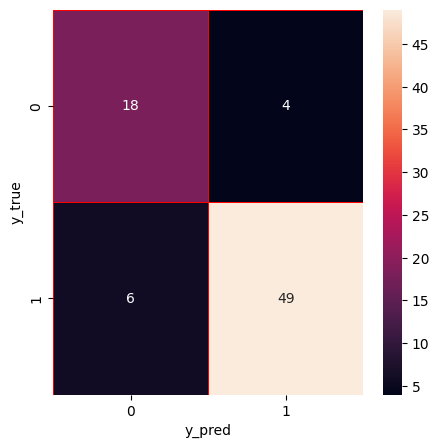

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_true= y_test
y_pred=clf.predict(X_test)
cm= confusion_matrix(y_true, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[1, 0]
fn = cm[0, 1]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.8701298701298701
Precision: 0.75
Recall: 0.8181818181818182
F1-Score: 0.7826086956521738


#Decision Tree
Using Transformed dataset
([Transformed Data](https://github.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/tree/master/Transformed%20Data ))

Accuracy: 0.8441558441558441

Precision: 0.8260869565217391

Recall: 0.7037037037037037

F1-Score: 0.76

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [ ]:
Transformed_Co='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Co'
Transformed_Pt='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Pt'

df1 = pd.read_csv(Transformed_Co, index_col = 0)
df2 = pd.read_csv(Transformed_Pt , index_col = 0)

In [ ]:
df1_len = df1.shape[0]
df2_len = df2.shape[0]
df2.shape + df1.shape

(214, 133, 92, 133)

In [ ]:
X = pd.concat([df1, df2])

In [ ]:
y1 = pd.Series([0]*df1_len)
y1.shape

(92,)

In [ ]:
y2 = pd.Series([1]*df2_len, index = range(df1_len-1,(df1_len + df2_len)-1))
y2.shape

(214,)

In [ ]:
y = pd.concat([y1,y2])
y.shape

(306,)

In [ ]:
max_dep = 0
score_val = 0
min_range = 0
max_range = 1000
state = 0

for rand_state in range(min_range, max_range):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y, random_state = rand_state)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    """scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)"""

    for dep in range(2, 15):
        clf = DecisionTreeClassifier(max_depth = dep).fit(X_train, y_train)
        score = clf.score(X_test, np.ravel(y_test))

        if score > score_val:
            max_dep = dep
            score_val = score
            state = rand_state

    print('{} out of {} done'.format(rand_state - min_range, max_range - min_range))
print("Max-Depth = {}, Score = {}, Random State = {}".format(max_dep, score_val, state))

0 out of 1000 done
1 out of 1000 done
2 out of 1000 done
3 out of 1000 done
4 out of 1000 done
5 out of 1000 done
6 out of 1000 done
7 out of 1000 done
8 out of 1000 done
9 out of 1000 done
10 out of 1000 done
11 out of 1000 done
12 out of 1000 done
13 out of 1000 done
14 out of 1000 done
15 out of 1000 done
16 out of 1000 done
17 out of 1000 done
18 out of 1000 done
19 out of 1000 done
20 out of 1000 done
21 out of 1000 done
22 out of 1000 done
23 out of 1000 done
24 out of 1000 done
25 out of 1000 done
26 out of 1000 done
27 out of 1000 done
28 out of 1000 done
29 out of 1000 done
30 out of 1000 done
31 out of 1000 done
32 out of 1000 done
33 out of 1000 done
34 out of 1000 done
35 out of 1000 done
36 out of 1000 done
37 out of 1000 done
38 out of 1000 done
39 out of 1000 done
40 out of 1000 done
41 out of 1000 done
42 out of 1000 done
43 out of 1000 done
44 out of 1000 done
45 out of 1000 done
46 out of 1000 done
47 out of 1000 done
48 out of 1000 done
49 out of 1000 done
50 out of 

In [ ]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
clf = DecisionTreeClassifier(max_depth = 20).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.58


In [ ]:
fi = clf.feature_importances_
print(np.max(fi))
np.argmax(fi)

0.08919089478453002


22

In [ ]:
print('[')
for zx in X.columns:


    if zx == 'Total_force_rightKurtosis':
        print("'{}'".format(zx))
    else:
        print("'{}',".format(zx))
print(']')

[
'Time(sec)Min',
'Time(sec)Max',
'Time(sec)Std',
'Time(sec)Med',
'Time(sec)Avg',
'Time(sec)Skewness',
'Time(sec)Kurtosis',
'VGRF_left_s1Min',
'VGRF_left_s1Max',
'VGRF_left_s1Std',
'VGRF_left_s1Med',
'VGRF_left_s1Avg',
'VGRF_left_s1Skewness',
'VGRF_left_s1Kurtosis',
'VGRF_left_s2Min',
'VGRF_left_s2Max',
'VGRF_left_s2Std',
'VGRF_left_s2Med',
'VGRF_left_s2Avg',
'VGRF_left_s2Skewness',
'VGRF_left_s2Kurtosis',
'VGRF_left_s3Min',
'VGRF_left_s3Max',
'VGRF_left_s3Std',
'VGRF_left_s3Med',
'VGRF_left_s3Avg',
'VGRF_left_s3Skewness',
'VGRF_left_s3Kurtosis',
'VGRF_left_s4Min',
'VGRF_left_s4Max',
'VGRF_left_s4Std',
'VGRF_left_s4Med',
'VGRF_left_s4Avg',
'VGRF_left_s4Skewness',
'VGRF_left_s4Kurtosis',
'VGRF_left_s5Min',
'VGRF_left_s5Max',
'VGRF_left_s5Std',
'VGRF_left_s5Med',
'VGRF_left_s5Avg',
'VGRF_left_s5Skewness',
'VGRF_left_s5Kurtosis',
'VGRF_left_s6Min',
'VGRF_left_s6Max',
'VGRF_left_s6Std',
'VGRF_left_s6Med',
'VGRF_left_s6Avg',
'VGRF_left_s6Skewness',
'VGRF_left_s6Kurtosis',
'VGRF_left_s7Min',

In [ ]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)


In [ ]:
zx = [
'Time(sec)Min',
'Time(sec)Max',
'Time(sec)Std',
'Time(sec)Med',
'Time(sec)Avg',
'Time(sec)Skewness',
'Time(sec)Kurtosis',
'VGRF_left_s1Min',
'VGRF_left_s1Max',
'VGRF_left_s1Std',
'VGRF_left_s1Med',
'VGRF_left_s1Avg',
'VGRF_left_s1Skewness',
'VGRF_left_s1Kurtosis',
'VGRF_left_s2Min',
'VGRF_left_s2Max',
'VGRF_left_s2Std',
'VGRF_left_s2Med',
'VGRF_left_s2Avg',
'VGRF_left_s2Skewness',
'VGRF_left_s2Kurtosis',
'VGRF_left_s3Min',
'VGRF_left_s3Max',
'VGRF_left_s3Std',
'VGRF_left_s3Med',
'VGRF_left_s3Avg',
'VGRF_left_s3Skewness',
'VGRF_left_s3Kurtosis',
'VGRF_left_s4Min',
'VGRF_left_s4Max',
'VGRF_left_s4Std',
'VGRF_left_s4Med',
'VGRF_left_s4Avg',
'VGRF_left_s4Skewness',
'VGRF_left_s4Kurtosis',
'VGRF_left_s5Min',
'VGRF_left_s5Max',
'VGRF_left_s5Std',
'VGRF_left_s5Med',
'VGRF_left_s5Avg',
'VGRF_left_s5Skewness',
'VGRF_left_s5Kurtosis',
'VGRF_left_s6Min',
'VGRF_left_s6Max',
'VGRF_left_s6Std',
'VGRF_left_s6Med',
'VGRF_left_s6Avg',
'VGRF_left_s6Skewness',
'VGRF_left_s6Kurtosis',
'VGRF_left_s7Min',
'VGRF_left_s7Max',
'VGRF_left_s7Std',
'VGRF_left_s7Med',
'VGRF_left_s7Avg',
'VGRF_left_s7Skewness',
'VGRF_left_s7Kurtosis',
'VGRF_left_s8Min',
'VGRF_left_s8Max',
'VGRF_left_s8Std',
'VGRF_left_s8Med',
'VGRF_left_s8Avg',
'VGRF_left_s8Skewness',
'VGRF_left_s8Kurtosis',
'VGRF_right_s1Min',
'VGRF_right_s1Max',
'VGRF_right_s1Std',
'VGRF_right_s1Med',
'VGRF_right_s1Avg',
'VGRF_right_s1Skewness',
'VGRF_right_s1Kurtosis',
'VGRF_right_s2Min',
'VGRF_right_s2Max',
'VGRF_right_s2Std',
'VGRF_right_s2Med',
'VGRF_right_s2Avg',
'VGRF_right_s2Skewness',
'VGRF_right_s2Kurtosis',
'VGRF_right_s3Min',
'VGRF_right_s3Max',
'VGRF_right_s3Std',
'VGRF_right_s3Med',
'VGRF_right_s3Avg',
'VGRF_right_s3Skewness',
'VGRF_right_s3Kurtosis',
'VGRF_right_s4Min',
'VGRF_right_s4Max',
'VGRF_right_s4Std',
'VGRF_right_s4Med',
'VGRF_right_s4Avg',
'VGRF_right_s4Skewness',
'VGRF_right_s4Kurtosis',
'VGRF_right_s5Min',
'VGRF_right_s5Max',
'VGRF_right_s5Std',
'VGRF_right_s5Med',
'VGRF_right_s5Avg',
'VGRF_right_s5Skewness',
'VGRF_right_s5Kurtosis',
'VGRF_right_s6Min',
'VGRF_right_s6Max',
'VGRF_right_s6Std',
'VGRF_right_s6Med',
'VGRF_right_s6Avg',
'VGRF_right_s6Skewness',
'VGRF_right_s6Kurtosis',
'VGRF_right_s7Min',
'VGRF_right_s7Max',
'VGRF_right_s7Std',
'VGRF_right_s7Med',
'VGRF_right_s7Avg',
'VGRF_right_s7Skewness',
'VGRF_right_s7Kurtosis',
'VGRF_right_s8Min',
'VGRF_right_s8Max',
'VGRF_right_s8Std',
'VGRF_right_s8Med',
'VGRF_right_s8Avg',
'VGRF_right_s8Skewness',
'VGRF_right_s8Kurtosis',
'Total_force_leftMin',
'Total_force_leftMax',
'Total_force_leftStd',
'Total_force_leftMed',
'Total_force_leftAvg',
'Total_force_leftSkewness',
'Total_force_leftKurtosis',
'Total_force_rightMin',
'Total_force_rightMax',
'Total_force_rightStd',
'Total_force_rightMed',
'Total_force_rightAvg',
'Total_force_rightSkewness',
'Total_force_rightKurtosis'
]

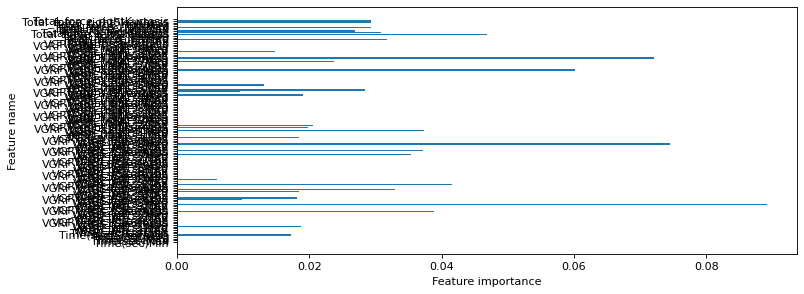

Feature importances: [0.         0.         0.         0.         0.01731904 0.
 0.         0.         0.         0.01872535 0.         0.
 0.         0.         0.         0.         0.         0.
 0.03881328 0.         0.         0.         0.08919089 0.
 0.         0.00991342 0.01823414 0.         0.         0.
 0.01850505 0.0329823  0.         0.         0.04160632 0.
 0.         0.0060582  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.0353469  0.
 0.0371844  0.         0.         0.         0.07444185 0.
 0.         0.         0.01841064 0.         0.         0.
 0.03736928 0.         0.01978819 0.02064849 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01903377 0.         0.00950036
 0.02840273 0.         0.         0.01321789 0.         0.
 0.         0.         0.  

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, zx)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [ ]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
clf = DecisionTreeClassifier(max_depth = 20).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.55


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.model_selection import GridSearchCV
best_score = 0
for i in range(200):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)


    grid_values = {'max_depth': [1, 2, 4, 5, 7, 10, 15, 20, 25, 40, 60, 100]}
    grid_clf = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy')
    grid_clf.fit(X_train, y_train1)


    if best_score < grid_clf.best_score_:
        best_score = grid_clf.best_score_
        best_params = grid_clf.best_params_
        prediction = grid_clf.predict(X_test)

        prec = precision_score(y_test, prediction)
        rec = recall_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)


print(best_score)
print(best_params)

0.8734299516908213
{'max_depth': 40}


In [ ]:
print('Precision: {:.4f}'.format(prec))
print('Recall: {:.4f}'.format(rec))
print('F1: {:.4f}'.format(f1))

Precision: 0.8431
Recall: 0.7818
F1: 0.8113


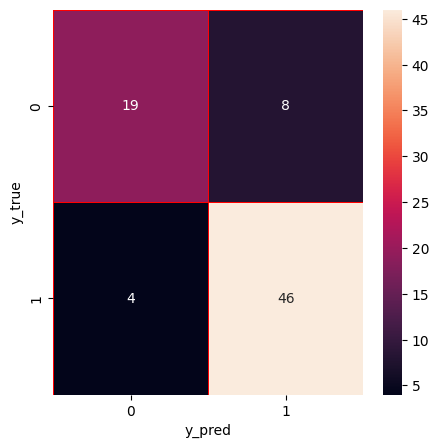

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_true= y_test
y_pred=grid_clf.predict(X_test)
cm= confusion_matrix(y_true, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[1, 0]
fn = cm[0, 1]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.8441558441558441
Precision: 0.8260869565217391
Recall: 0.7037037037037037
F1-Score: 0.76


#Random Forest
Using Transformed dataset
([Transformed Data](https://github.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/tree/master/Transformed%20Data ))

Accuracy: 0.8571428571428571

Precision: 0.9375

Recall: 0.6

F1-Score: 0.7317073170731707


In [ ]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
import os
import scipy.stats as sc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Transformed_Co='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Co'
Transformed_Pt='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Pt'

df_co = pd.read_csv(Transformed_Co, index_col = 0)
df_pt = pd.read_csv(Transformed_Pt , index_col = 0)

In [ ]:
pca1 = decomposition.PCA(n_components=50)
df_co_pca = pca1.fit_transform(df_co)
df_pt_pca = pca1.fit_transform(df_pt)

df_co_pca= df_co
df_pt_pca= df_pt
df_co_len = df_co_pca.shape[0]
df_pt_len = df_pt_pca.shape[0]
df_co_pca = pd.DataFrame(df_co_pca)
df_pt_pca = pd.DataFrame(df_pt_pca)
X = pd.concat([df_co_pca, df_pt_pca])

In [ ]:
y1 = pd.Series([0]*df_co_len)
y1.shape

(92,)

In [ ]:
y2 = pd.Series([1]*df_pt_len, index = range(df_co_len-1,(df_co_len + df_pt_len)-1))
y2.shape

(214,)

In [ ]:
y = pd.concat([y1,y2])
y.shape

(306,)

In [ ]:
max_est = 0
max_acc = 0
curr_max_acc = 0
curr_max_est =0

for i in range (0,100):

    X_train, X_test, y_train1, y_test1 = train_test_split(X, y, random_state=i)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)




    for n in [40,50,100,150,200,250,300]:

            clf = RandomForestClassifier(n_estimators = int(n), n_jobs=3)
            clf.fit(X_train, np.ravel(y_train))
            if max_acc < clf.score(X_test, np.ravel(y_test)):
                max_acc = clf.score(X_test, np.ravel(y_test))
                max_est = n
    if(curr_max_acc < max_acc):
            curr_max_acc = max_acc
            curr_max_est = max_est
            n_rs = i
    print("{} done".format(i))
print(curr_max_acc,curr_max_est, n_rs)

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
0.974025974025974 150 51


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(229, 133)
(77, 133)
(229, 1)
(77, 1)


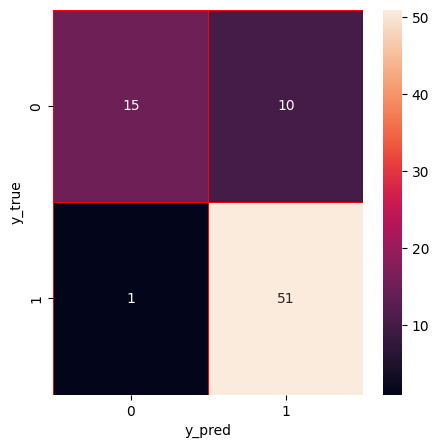

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_true= y_test
y_pred=clf.predict(X_test)
cm= confusion_matrix(y_true, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[1, 0]
fn = cm[0, 1]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.8571428571428571
Precision: 0.9375
Recall: 0.6
F1-Score: 0.7317073170731707


#Random Forest (Fixed Accuracy vals)
Using Transformed dataset
([Transformed Data](https://github.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/tree/master/Transformed%20Data ))

Accuracy: 0.8051948051948052

Precision: 0.7619047619047619

Recall: 0.6153846153846154

F1-Score: 0.6808510638297872

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

In [ ]:
Transformed_Co='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Co'
Transformed_Pt='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Pt'

df1 = pd.read_csv(Transformed_Co, index_col = 0)
df2 = pd.read_csv(Transformed_Pt , index_col = 0)

In [ ]:

df1_len = df1.shape[0]
df2_len = df2.shape[0]
df2.shape + df1.shape

(214, 133, 92, 133)

In [ ]:
X = pd.concat([df1, df2])

In [ ]:
y1 = pd.Series([0]*df1_len)
y1.shape

(92,)

In [ ]:
y2 = pd.Series([1]*df2_len, index = range(df1_len-1,(df1_len + df2_len)-1))
y2.shape

(214,)

In [ ]:
y = pd.concat([y1,y2])
y.shape

(306,)

In [ ]:
y.tail()


300    1
301    1
302    1
303    1
304    1
dtype: int64

In [ ]:
max_acc=0
max_est =0
curr_max_acc=0
curr_max_n=0
for i in range(1, 100):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, np.ravel(y),random_state=i)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    for n in [5, 10, 20, 40, 100, 200]:
        clf = RandomForestClassifier(n_estimators = int(n), n_jobs=2)
        clf.fit(X_train, np.ravel(y_train))
        if(max_acc < clf.score(X_test, np.ravel(y_test))):
                max_acc = clf.score(X_test, np.ravel(y_test))
                max_n=int(n)

    if(curr_max_acc < max_acc):
            curr_max_acc = max_acc
            curr_max_n= max_n
            n_rs = i
    print("{} done".format(i))
print("Accuracy = {}, n_estimators = {}, Random State = {}".format(curr_max_acc, curr_max_n, n_rs))

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
Accuracy = 0.961038961038961, n_estimators = 40, Random State = 15


In [ ]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, np.ravel(y))
y_train = pd.DataFrame(y_train1)
y_test = pd.DataFrame(y_test1)
clf = RandomForestClassifier(n_estimators = 200, n_jobs=2, max_depth=10)
clf.fit(X_train, np.ravel(y_train))
clf.score(X_test, np.ravel(y_test))

0.8311688311688312

In [ ]:
y_train.shape

(229, 1)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_vals = {'n_estimators': [5, 10, 20, 40, 100, 200]}
grid_clf = GridSearchCV(clf, param_grid=grid_vals, scoring='accuracy')
grid_clf.fit(X_train, y_train1.reshape(229,))
# decision_fn_scores = grid_clf.decision_function(X_test)

grid_clf.best_score_

0.8730434782608695

In [ ]:
grid_clf.best_params_

{'n_estimators': 20}

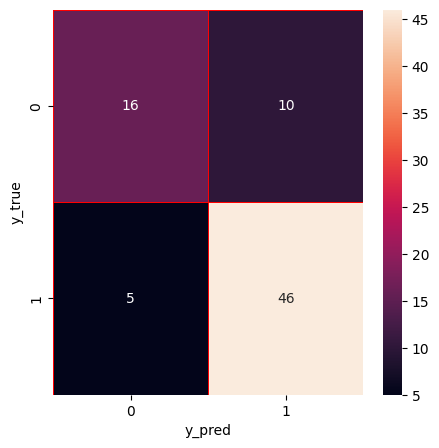

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_true= y_test
y_pred=grid_clf.predict(X_test)
cm= confusion_matrix(y_true, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[1, 0]
fn = cm[0, 1]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.8051948051948052
Precision: 0.7619047619047619
Recall: 0.6153846153846154
F1-Score: 0.6808510638297872


#Random Forest (Most Important features)
Using Transformed dataset
([Transformed Data](https://github.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/tree/master/Transformed%20Data ))

Accuracy: 0.7532467532467533

Precision: 0.46153846153846156

Recall: 0.3333333333333333

F1-Score: 0.3870967741935484

In [ ]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

In [ ]:
Transformed_Co='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Co'
Transformed_Pt='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Pt'

df1 = pd.read_csv(Transformed_Co, index_col = 0)
df2 = pd.read_csv(Transformed_Pt , index_col = 0)

In [ ]:
pca1 = decomposition.PCA(n_components=4)
df1 = pca1.fit_transform(df1)
df2 = pca1.fit_transform(df2)

In [ ]:
df1_len = df1.shape[0]
df2_len = df2.shape[0]
df2.shape + df1.shape

(214, 4, 92, 4)

In [ ]:
df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)

In [ ]:
X = pd.concat([df1, df2])

In [ ]:
y1 = pd.Series([0]*df1_len)
y1.shape

(92,)

In [ ]:
y2 = pd.Series([1]*df2_len, index = range(df1_len-1,(df1_len + df2_len)-1))
y2.shape

(214,)

In [ ]:
y = pd.concat([y1,y2])
y.shape

(306,)

In [ ]:
y.tail()

300    1
301    1
302    1
303    1
304    1
dtype: int64

In [ ]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
y_train = pd.DataFrame(y_train1)
y_test = pd.DataFrame(y_test1)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(229, 4)
(77, 4)
(229, 1)
(77, 1)


In [ ]:
clf = RandomForestClassifier(n_estimators = 312, random_state = 0,n_jobs=-1)
clf.fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

<ipython-input-52-7932542e4613>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.75


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_true= y_test
y_pred=clf.predict(X_test)
cm= confusion_matrix(y_true, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[1, 0]
fn = cm[0, 1]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.7532467532467533
Precision: 0.46153846153846156
Recall: 0.3333333333333333
F1-Score: 0.3870967741935484


#Polynomial Features

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [ ]:
Transformed_Co='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Co'
Transformed_Pt='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Pt'

df_co = pd.read_csv(Transformed_Co, index_col = 0)
df_pt = pd.read_csv(Transformed_Pt , index_col = 0)

In [ ]:
df_co.shape

(92, 133)

In [ ]:
df_pt.shapeds_co = df_co.iloc[:, 1:-2]
df_pt = df_pt.iloc[:, 1:-2]

<ipython-input-39-4334659f410c>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_pt.shapeds_co = df_co.iloc[:, 1:-2]


In [ ]:
poly = PolynomialFeatures(degree=2)
df_co_poly = poly.fit_transform(df_co)
df_pt_poly = poly.fit_transform(df_pt)

#Random Forest using PCA without poly
Using PCA dataset
([PCA Data](https://github.com/ravenn3105/Parkinson-s-Disease-Detection-using-Gait-Analysis/tree/master/PCA ))

Accuracy: 0.7662337662337663

Precision: 0.5

Recall: 0.3888888888888889

F1-Score: 0.43750000000000006

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

In [ ]:
PCA_without_poly_Co_fifth='https://raw.githubusercontent.com/ravenn3105/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/PCA/PCA_without_poly_Co_test.csv'
PCA_without_poly_Pt_fifth='https://raw.githubusercontent.com/ravenn3105/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/PCA/PCA_without_poly_Pt_test.csv'
df1 = pd.read_csv(PCA_without_poly_Co_fifth, index_col = 0)
df2 = pd.read_csv(PCA_without_poly_Pt_fifth , index_col = 0)

In [ ]:
df1_len = df1.shape[0]
df2_len = df2.shape[0]
df2.shape + df1.shape

(254478, 2, 217624, 2)

In [ ]:
X = pd.concat([df1, df2])

In [ ]:
y1 = pd.Series([0]*df1_len)
y1.shape

(217624,)

In [ ]:
y2 = pd.Series([1]*df2_len, index = range(df1_len-1,(df1_len + df2_len)-1))
y2.shape

(254478,)

In [ ]:
y = pd.concat([y1,y2])
y.shape

(472102,)

In [ ]:
y.tail()

472096    1
472097    1
472098    1
472099    1
472100    1
dtype: int64

In [ ]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
y_train = pd.DataFrame(y_train1)
y_test = pd.DataFrame(y_test1)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354076, 2)
(118026, 2)
(354076, 1)
(118026, 1)


In [ ]:
clf = RandomForestClassifier(n_estimators = 1000, random_state = 0,n_jobs=-1)
clf.fit(X_train, y_train.values.ravel())

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.77


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_true= y_test
y_pred=clf.predict(X_test)
cm= confusion_matrix(y_true, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[1, 0]
fn = cm[0, 1]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.7662337662337663
Precision: 0.5
Recall: 0.3888888888888889
F1-Score: 0.43750000000000006


#MLP

In [ ]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
import os
import scipy.stats as sc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
Transformed_Co='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Co'
Transformed_Pt='https://raw.githubusercontent.com/mittrayash/Parkinson-s-Disease-Detection-using-Gait-Analysis/master/Transformed%20Data/Transformed_Pt'

df_co = pd.read_csv(Transformed_Co, index_col = 0)
df_pt = pd.read_csv(Transformed_Pt , index_col = 0)

In [ ]:
df_co_pca= df_co
df_pt_pca= df_pt
df_co_len = df_co_pca.shape[0]
df_pt_len = df_pt_pca.shape[0]
df_co_pca = pd.DataFrame(df_co_pca)
df_pt_pca = pd.DataFrame(df_pt_pca)
X = pd.concat([df_co_pca, df_pt_pca])

In [ ]:
y1 = pd.Series([0]*df_co_len)
y1.shape

(92,)

In [ ]:
y2 = pd.Series([1]*df_pt_len, index = range(df_co_len-1,(df_co_len + df_pt_len)-1))
y2.shape

(214,)

In [ ]:
y = pd.concat([y1,y2])
y.shape

(306,)

In [ ]:
c_val = 0
score_val = 0
min_range = 0
max_range = 100
state = 0
gamma = 0


for rand_state in range(min_range, max_range):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y, random_state = rand_state)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    clf = MLPClassifier(max_iter=500, activation='relu').fit(X_train, y_train)
    score = clf.score(X_test, np.ravel(y_test))



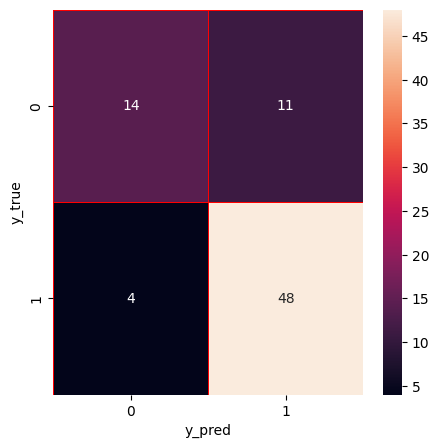

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_true= y_test
y_pred=clf.predict(X_test)
cm= confusion_matrix(y_true, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[1, 0]
fn = cm[0, 1]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.8051948051948052
Precision: 0.7777777777777778
Recall: 0.56
F1-Score: 0.6511627906976745
